### Cross Cloud Orchestration

This simulation compares latency and failover performance between a static (non-orchestrated) and adaptive (ACDOF-style) cross-cloud scheduling.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

Define 3 clouds with latency and failure rates

In [2]:
clouds = {
"AWS": {"avg_latency": 100, "fail_rate": 0.05},
"Azure": {"avg_latency": 120, "fail_rate": 0.02},
"GCP": {"avg_latency": 90, "fail_rate": 0.07}
}

Simulate 100 jobs

In [6]:
num_jobs = 100
static_latencies = []
adaptive_latencies = []
failover_events = 0
for _ in range(num_jobs):
    job_latency = 0
    # Static scheduler always picks AWS
    if random.random() < clouds["AWS"]["fail_rate"]:
      # job failed, add high penalty
      static_latencies.append(500)
    else:
      latency = random.gauss(clouds["AWS"]["avg_latency"], 10)
      static_latencies.append(latency)

Adaptive scheduler picks lowest latency and reroutes on failure.
Pick cloud with lowest avg latency

In [8]:
sorted_clouds = sorted(clouds.items(), key=lambda x: x[1]["avg_latency"])
for provider, info in sorted_clouds:
    if random.random() > info["fail_rate"]:
        latency = random.gauss(info["avg_latency"], 10)
        adaptive_latencies.append(latency)
        break
    else:
        # All failed
        adaptive_latencies.append(500)
        failover_events += 1

Results

/tmp/ipython-input-808942416.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([static_latencies, adaptive_latencies], labels=["Static Scheduler", "Adaptive ACDOF"])


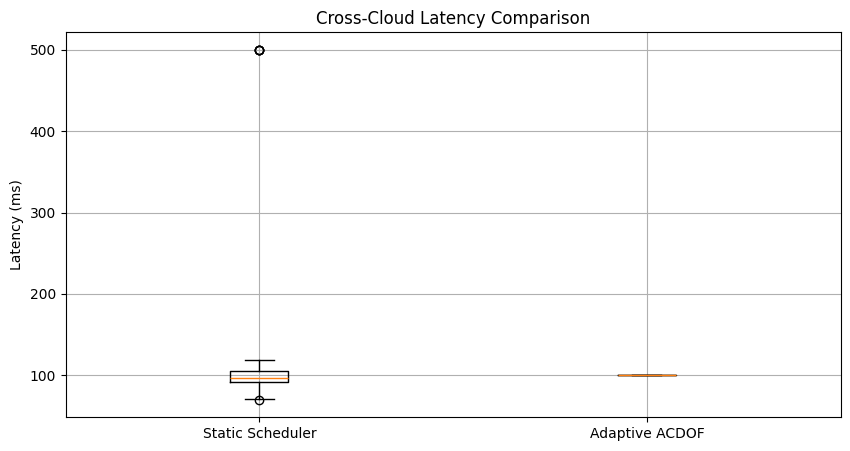

Static Scheduler - Failures Treated as 500ms Penalty
Adaptive Scheduler - Failover Events: 0
Average Latency (Static): 113.29 ms
Average Latency (Adaptive): 100.01 ms


In [9]:
plt.figure(figsize=(10, 5))
plt.boxplot([static_latencies, adaptive_latencies], labels=["Static Scheduler", "Adaptive ACDOF"])
plt.ylabel("Latency (ms)")
plt.title("Cross-Cloud Latency Comparison")
plt.grid(True)
plt.show()
print("Static Scheduler - Failures Treated as 500ms Penalty")
print("Adaptive Scheduler - Failover Events:", failover_events)
print("Average Latency (Static):", round(np.mean(static_latencies), 2), "ms")
print("Average Latency (Adaptive):", round(np.mean(adaptive_latencies), 2), "ms")